# Kaggle: Telco Customer Churn.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)


In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df = df.drop(['customerID'], axis = 1)
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.Partner.replace(["Yes","No"],[1,0],inplace=True)

In [10]:
df.StreamingTV.replace(["Yes","No"],[1,0],inplace=True)

In [11]:
df.TechSupport.replace(["Yes","No"],[1,0],inplace=True)

In [12]:
df.DeviceProtection.replace(["Yes","No"],[1,0],inplace=True)

In [13]:
df.OnlineBackup.replace(["Yes","No"],[1,0],inplace=True)

In [14]:
df.OnlineSecurity.replace(["Yes","No"],[1,0],inplace=True)

In [15]:
df.InternetService.replace(["Yes","No"],[1,0],inplace=True)

In [16]:
df.PhoneService.replace(["Yes","No"],[1,0],inplace=True)

In [17]:
df.MultipleLines.replace(["Yes","No"],[1,0],inplace=True)

In [18]:
df.StreamingMovies.replace(["Yes","No"],[1,0],inplace=True)

# 1. Demographics 


In [19]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,No,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,0,No,34,1,0,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,0,No,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,0,No,45,0,No phone service,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,0,No,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,Yes,24,1,1,DSL,1,0,1,1,1,1,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,1,Yes,72,1,1,Fiber optic,0,1,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,1,Yes,11,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,1,No,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


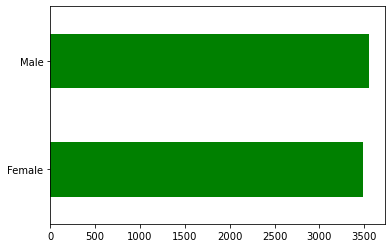

In [20]:
#df.groupby(['gender']).size()

df["gender"].value_counts().sort_values().plot(kind = 'barh',color= "green")

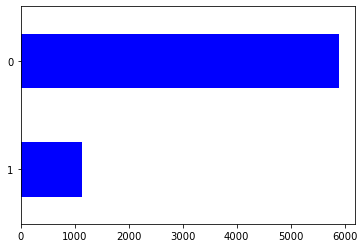

In [21]:
#df.groupby(['SeniorCitizen']).size()
df["SeniorCitizen"].value_counts().sort_values().plot(kind = 'barh',color= "blue")

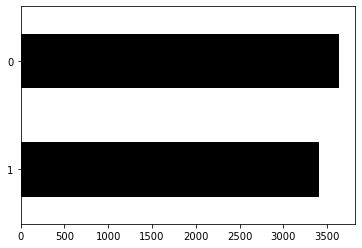

In [22]:
#df["Partner"].value_counts()
df["Partner"].value_counts().sort_values().plot(kind = 'barh',color= "black")

In [23]:
# Combine levels in a categorical variable by seeing their distribution
JobRoleCrossTab = pd.crosstab(df['gender'], df['Partner'], margins=True)
JobRoleCrossTab

Partner,0,1,All
gender,,,
Female,1800,1688,3488
Male,1841,1714,3555
All,3641,3402,7043


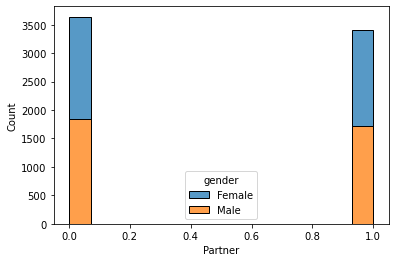

In [24]:
sns.histplot(df, x="Partner", hue="gender", multiple="stack")

In [25]:
# Combine levels in a categorical variable by seeing their distribution
JobRoleCrossTab = pd.crosstab(df['SeniorCitizen'], df['gender'],margins=True)
JobRoleCrossTab

gender,Female,Male,All
SeniorCitizen,,,
0,2920,2981,5901
1,568,574,1142
All,3488,3555,7043


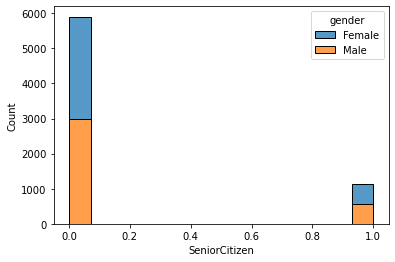

In [26]:
sns.histplot(df, x="SeniorCitizen", hue="gender", multiple="stack")

In [27]:
#df.Attrition.replace(["Yes","No"],[1,0],inplace=True)

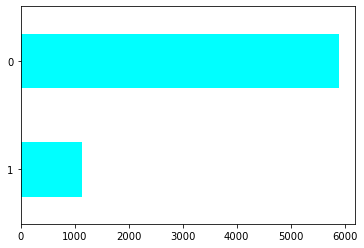

In [28]:
df["SeniorCitizen"].value_counts().sort_values().plot(kind = 'barh',color= "cyan")

In [29]:
#Young population were the the most popular customers of the brand with senior citizen being low.This can be attributed to that young people are more savy with their phones than senior citizens.
#When it comes to partners it seems like almost a tie in use of the telco services but those without a partner seem more popular with the brand
#The marketing team should focus their efforts on the young generation and of both gender, regardless if they have a partner or not. The partner aspect has very little difference when it comes to it.

# 2. Services:
a. Which 3 services are contributing to a higher monthly charge and resulting to customers churning? (Use visualizations in explaining your analysis)

In [30]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,No,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,0,No,34,1,0,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,0,No,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,0,No,45,0,No phone service,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,0,No,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


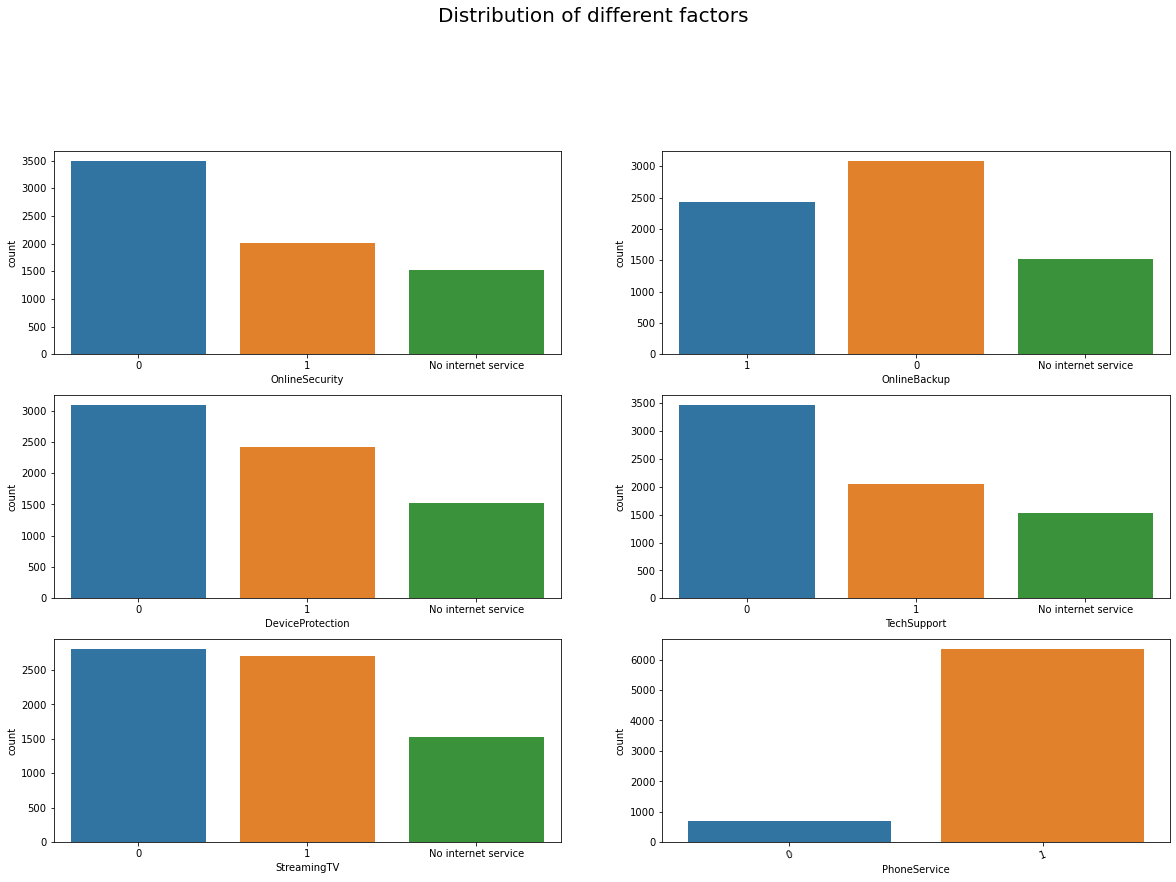

In [31]:
# Plotting countplots for the categorical variables
fig,ax = plt.subplots(3,2, figsize=(20,20))            
plt.suptitle("Distribution of different factors", fontsize=20)
sns.countplot(df['OnlineSecurity'], ax = ax[0,0]) 
sns.countplot(df['OnlineBackup'], ax = ax[0,1]) 
sns.countplot(df['DeviceProtection'], ax = ax[1,0]) 
sns.countplot(df['TechSupport'], ax = ax[1,1])
sns.countplot(df['StreamingTV'], ax = ax[2,0])  
sns.countplot(df['PhoneService'], ax = ax[2,1])  
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

In [32]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,No,1,0,No phone service,DSL,0,1,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,0,No,34,1,0,DSL,1,0,1,0,0,0,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,0,No,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,0,No,45,0,No phone service,DSL,1,0,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,0,No,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,Yes,24,1,1,DSL,1,0,1,1,1,1,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,1,Yes,72,1,1,Fiber optic,0,1,1,0,1,1,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,1,Yes,11,0,No phone service,DSL,1,0,0,0,0,0,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,1,No,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


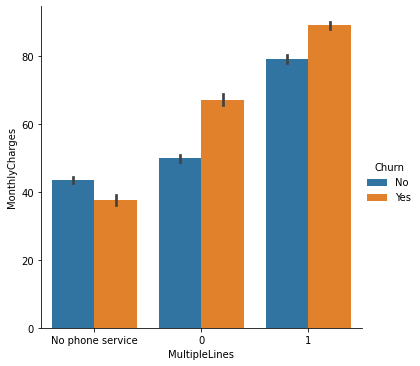

In [33]:
sns.catplot(data=df, kind="bar", x="MultipleLines", y="MonthlyCharges", hue="Churn")

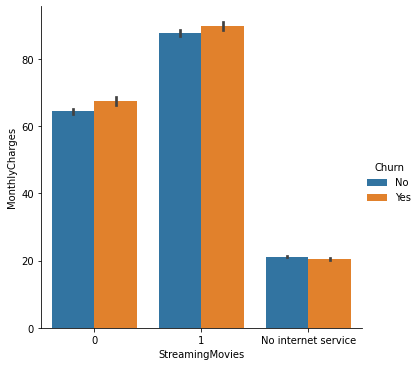

In [34]:
sns.catplot(data=df, kind="bar", x="StreamingMovies", y="MonthlyCharges", hue="Churn")

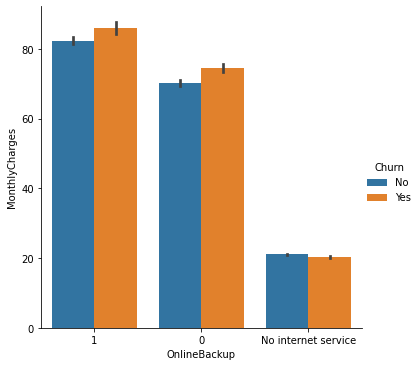

In [35]:
sns.catplot(data=df, kind="bar", x="OnlineBackup", y="MonthlyCharges", hue="Churn")

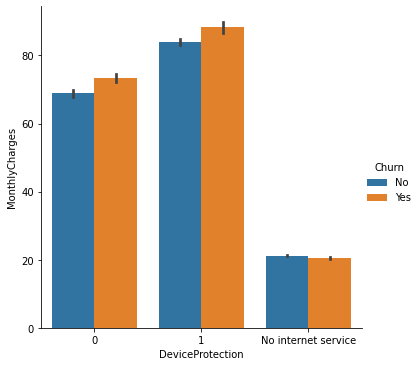

In [36]:
sns.catplot(data=df, kind="bar", x="DeviceProtection", y="MonthlyCharges", hue="Churn")

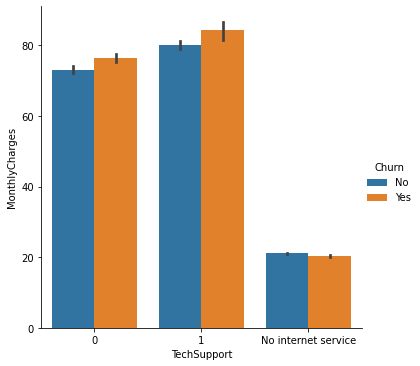

In [37]:
sns.catplot(data=df, kind="bar", x="TechSupport", y="MonthlyCharges", hue="Churn")

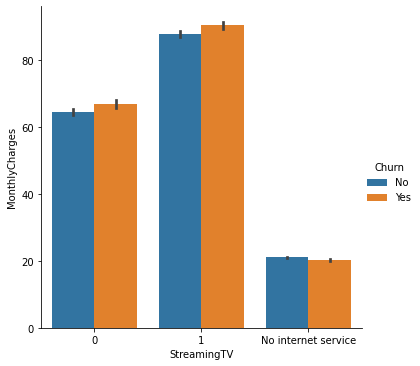

In [38]:
sns.catplot(data=df, kind="bar", x="StreamingTV", y="MonthlyCharges", hue="Churn")

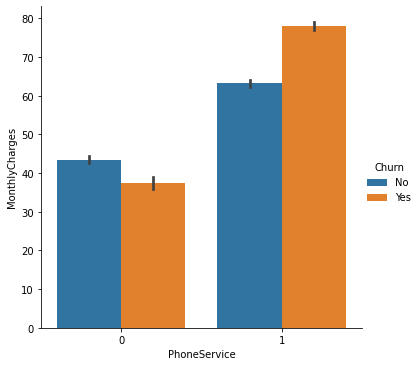

In [39]:
#sns.histplot(df,x="PhoneService", hue="Churn", multiple="stack")
sns.catplot(data=df, kind="bar", x="PhoneService", y="MonthlyCharges", hue="Churn")

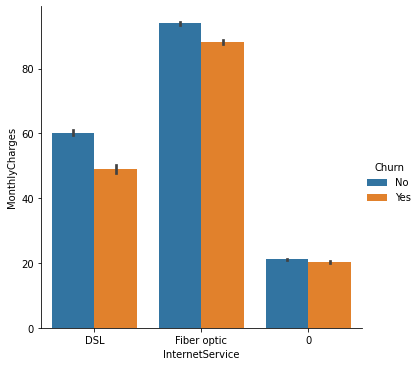

In [40]:
sns.catplot(data=df, kind="bar", x="InternetService", y="MonthlyCharges", hue="Churn")

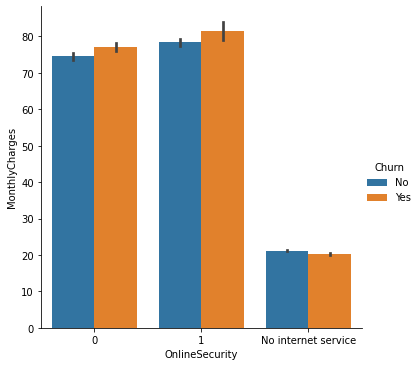

In [41]:
sns.catplot(data=df, kind="bar", x="OnlineSecurity", y="MonthlyCharges", hue="Churn")

In [42]:
#StreamingMovies,StreamingMovies and Multiple lines had the highest contribution to a higher monthly charge and customers churning

# b. 
If the telco was to offer Phone as a standalone service, which type of contract 
would encourage customer retention?

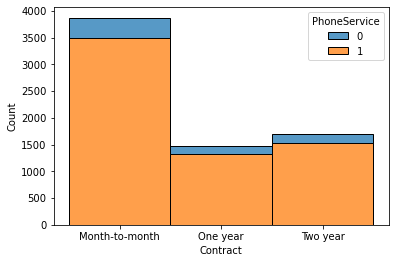

In [43]:

sns.histplot(df, hue="PhoneService", x="Contract", multiple="stack")

In [44]:
df["PhoneService"].value_counts()

1    6361
0     682
Name: PhoneService, dtype: int64

In [45]:
df["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [46]:
#Month-to-month services have the highest customer base. This shows that if it was to be offered as a stand alone service, then it's month-to-to month services would be the most profitable of all the contracts.

# 3. Payment: (Use visualizations in explaining your analysis)
a. If the company was to streamline all its services into 3 bouquet packages, what 
monthly prices will be appropriate for the following packages to keep customers 
from churning:
i. Basic
ii. Plus
iii. Premium

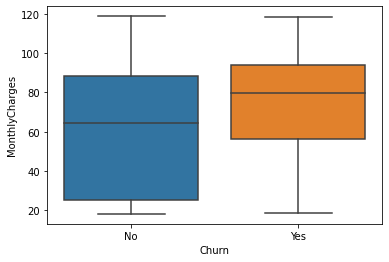

In [47]:
sns.boxplot(y="MonthlyCharges", x="Churn", data=df)


In [48]:
df["MonthlyCharges"].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [49]:
#The company should price its packages as 
# i. Basic = 35.50
#   ii. Plus = 70.35
#       iii. Premium = 89.85

# b.
Should the company strictly go paperless for their monthly billings as a technique 
of keeping their customers and why?

In [50]:
df["PaperlessBilling"].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

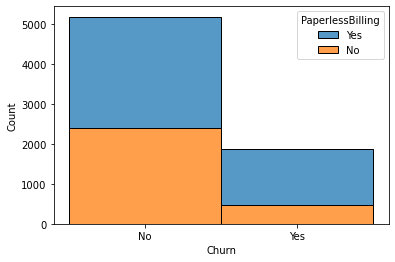

In [51]:
sns.histplot(df, x="Churn", hue="PaperlessBilling", multiple="stack")

In [52]:
#PaperlessBilling had the lowest churn among the customer. 
#It could be that customers find paperlessBilling cumbersome to work with hence opt out of the telco customer base